In [1]:
#******************* DOWNLOADING ALL THE LIBRARIES AND PACKAGES **************************

In [2]:
#Following avoids a warning for KMeans
%env OMP_NUM_THREADS=2

import warnings
warnings.filterwarnings('ignore')

# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)


from scipy.special import comb
import math
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

env: OMP_NUM_THREADS=2


In [3]:
#****************** UPLOADING RELEVANT FILES *****************
import io
from google.colab import files

uploaded_1 = files.upload()

df1 = pd.read_csv(io.BytesIO(uploaded_1['master.csv']))

# data check
df1.head()

Saving master.csv to master.csv


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#********************** BASIC PROPERTIES OF THE DATA ******************

In [5]:
df1.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_for_year($)        object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [6]:
df1.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
gdp_for_year($)       False
gdp_per_capita ($)    False
generation            False
dtype: bool

In [7]:
df1["is_duplicate"]= df1.duplicated()
print(f"#total= {len(df1)}")
print(f"#duplicated= {len(df1[df1['is_duplicate']==True])}")

#total= 27820
#duplicated= 0


In [8]:
df1.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year($)           0
gdp_per_capita ($)        0
generation                0
is_duplicate              0
dtype: int64

In [9]:
#******************************* DATA PRE-PROCESSING *******************************

In [10]:
# Using Data pre-processing decisions from Assignment: 3

# the column country-year seems to be redundant so getting rid of it
del df1['country-year']


In [11]:
# Getting rid of suicides_no and population because suicides/100k captures the 
# information from both columns
del df1['suicides_no']

In [12]:
del df1['population']

In [13]:
# converting data type of gdp to integer
# first getting rid of commas
df1["gdp_for_year($)"] = [float(str(i).replace(",", "")) for i in df1["gdp_for_year($)"]]
df1['gdp_for_year($)'].astype(str).astype(float)

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name: gdp_for_year($), Length: 27820, dtype: float64

In [14]:
del df1['is_duplicate']

In [15]:
# data check
df1.head(5)

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,6.71,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,5.19,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,4.83,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,4.59,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,NaN,2.156625e+09,796,Boomers


In [16]:
# replacing missing values in HDI with mean
# does this replacement makes sense? is there a better way?
mean_hdi = df1['HDI for year'].mean()

# Impute
df1['HDI for year'] = df1['HDI for year'].fillna(mean_hdi)


In [17]:
#******************************** ONE HOT ENCODING **************************

df1.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides/100k pop     float64
HDI for year          float64
gdp_for_year($)       float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [18]:
# encoding sex, age, generation and country
df2 = df1.copy()
df3 = pd.get_dummies(df2[['sex', 'age', 'generation', 'country']])


In [19]:
# deleted columns that were hot-enocded from df2 so that df2 and df3 could be concatenated
df2.drop(['sex', 'age', 'generation', 'country'], axis=1, inplace=True)
df2.head()

,year,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($)
0,1987,6.71,0.776601,2.156625e+09,796
1,1987,5.19,0.776601,2.156625e+09,796
2,1987,4.83,0.776601,2.156625e+09,796
3,1987,4.59,0.776601,2.156625e+09,796
4,1987,3.28,0.776601,2.156625e+09,796


In [20]:
print(f'shape of orginal data set is {df1.shape}')
print(f'shape of hot encoded data set is {df2.shape}')
print(f'shape of hot encoded data set is {df3.shape}')

shape of orginal data set is (27820, 9)
shape of hot encoded data set is (27820, 5)
shape of hot encoded data set is (27820, 115)


In [21]:
# FINAL DATAFRAME TO BE USED

# concatenate df2 and df3
df = pd.concat([df2,df3], axis=1)
df.head()

,year,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($),sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,6.71,0.776601,2.156625e+09,796,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1987,5.19,0.776601,2.156625e+09,796,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1987,4.83,0.776601,2.156625e+09,796,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1987,4.59,0.776601,2.156625e+09,796,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1987,3.28,0.776601,2.156625e+09,796,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#******************** VISUALIZING THE DATA ******************

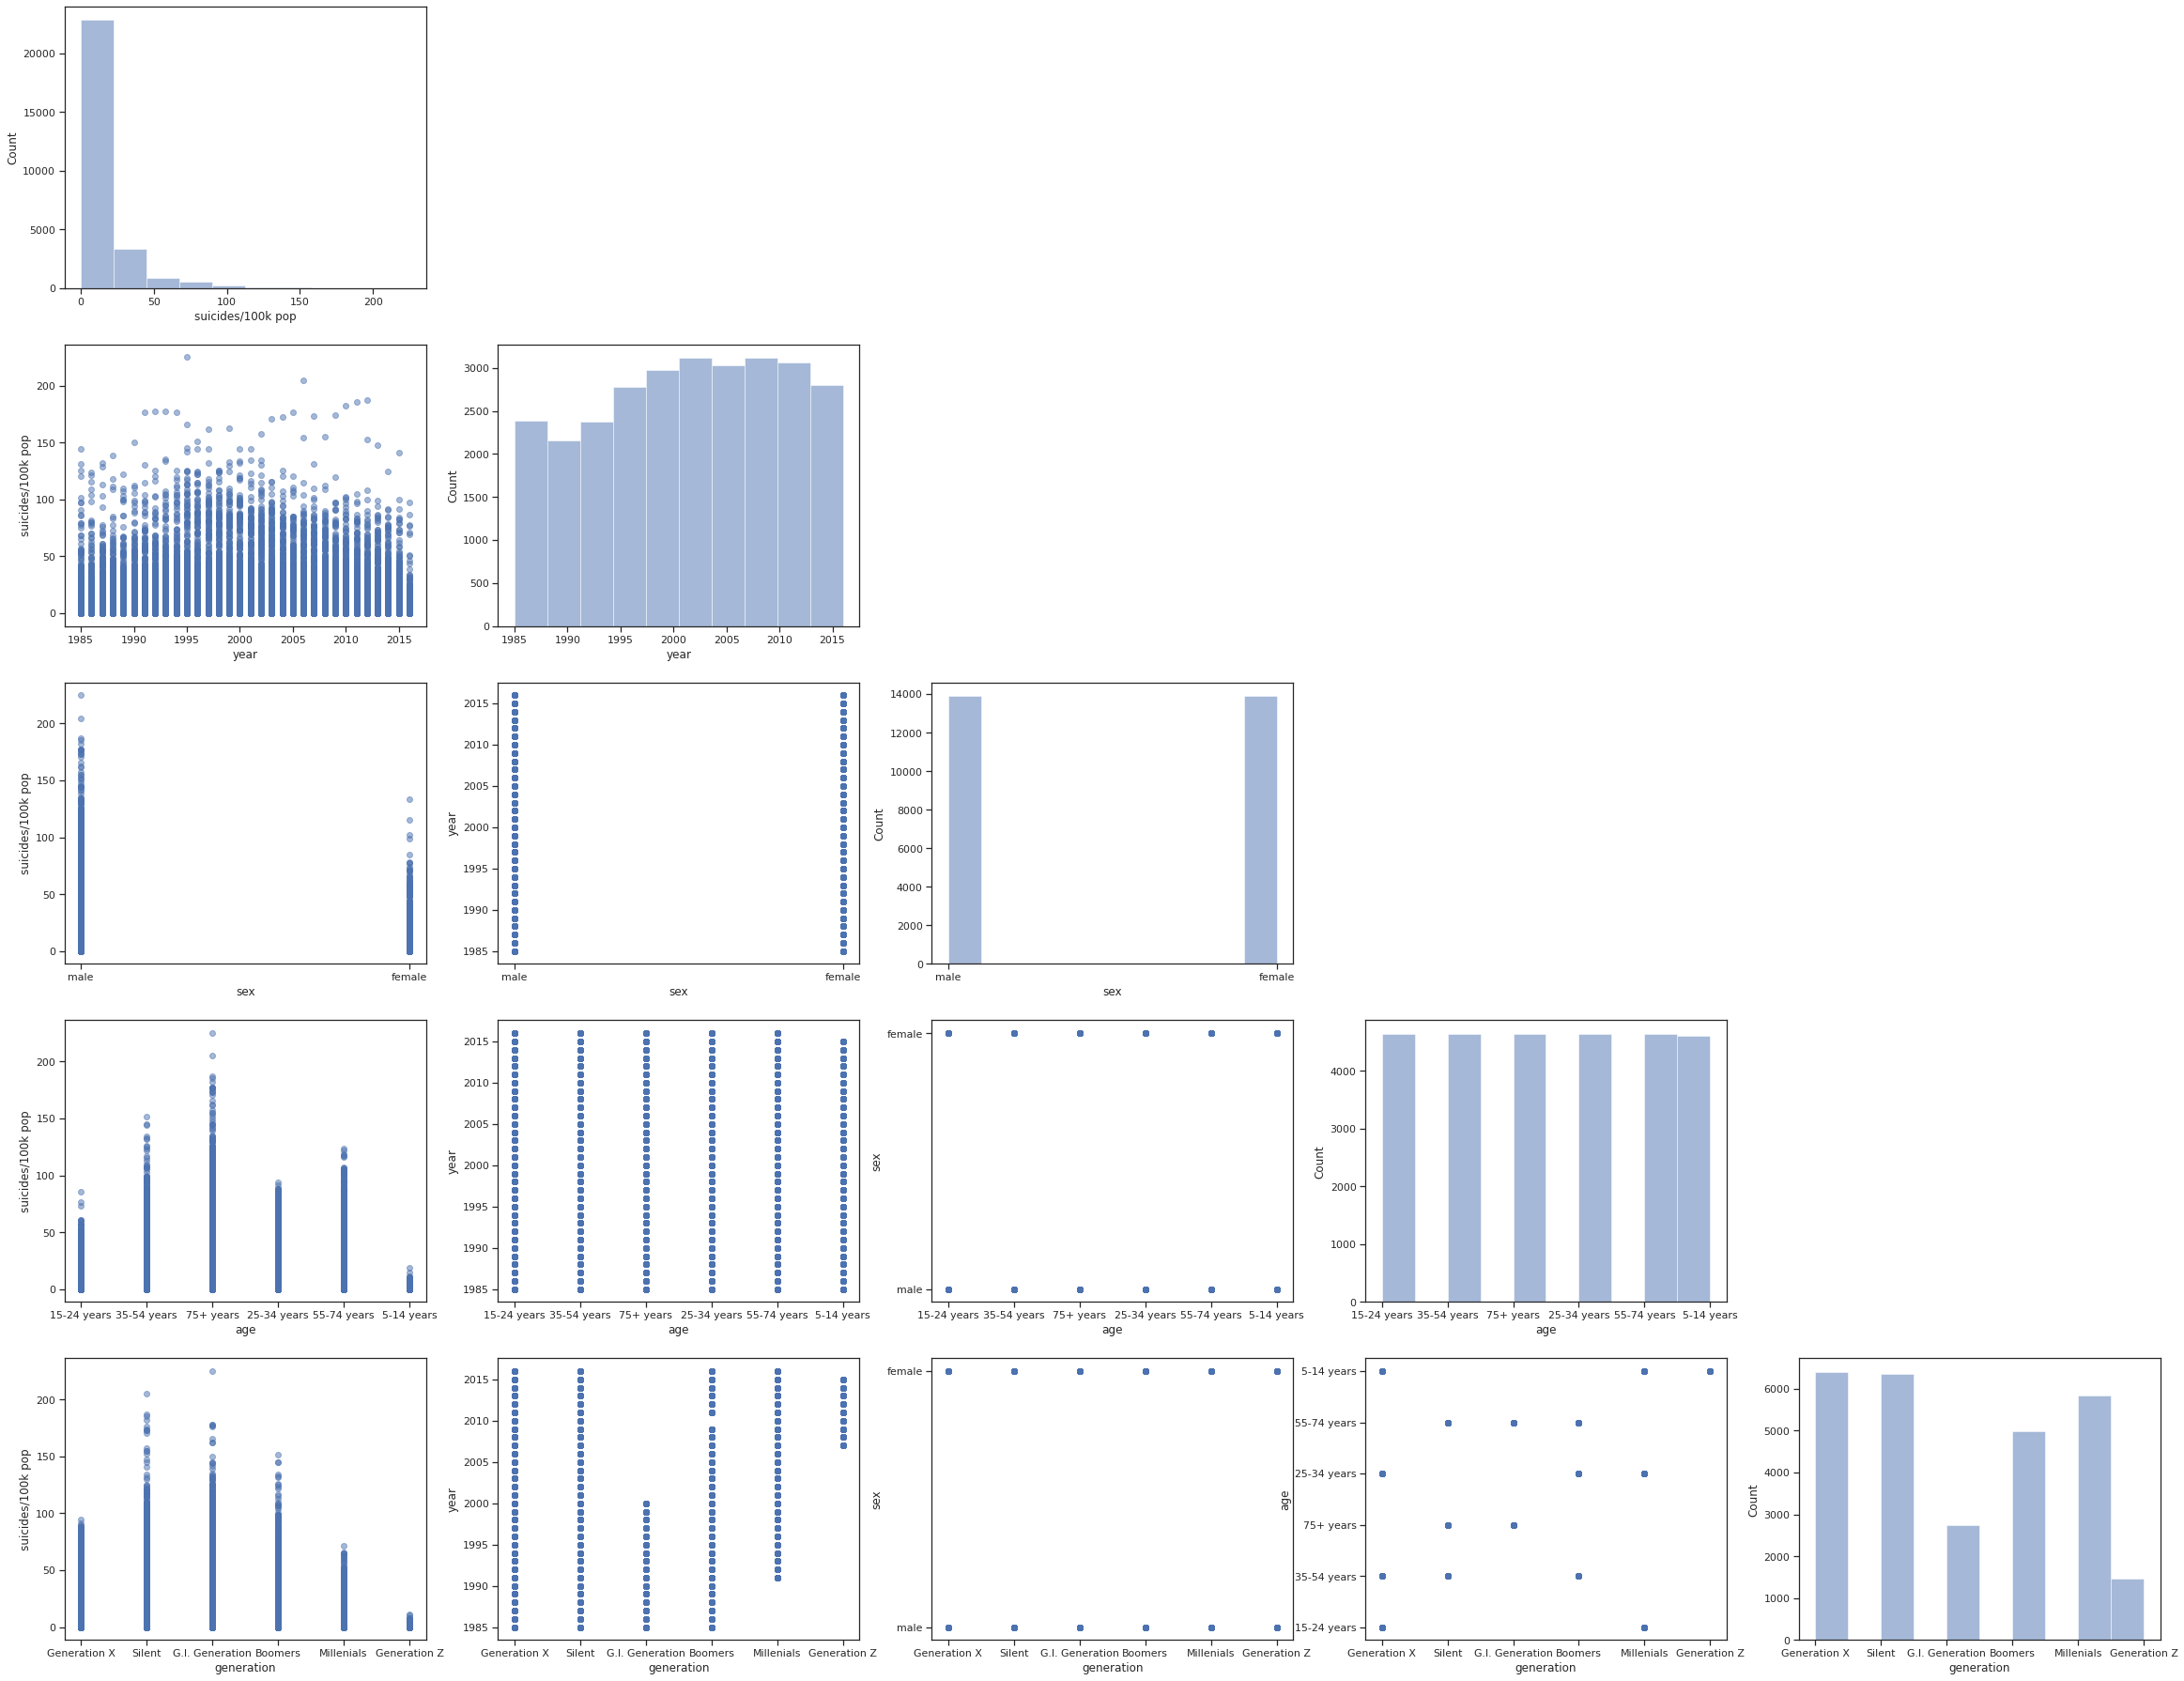

In [23]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['suicides/100k pop','year', 'sex', 'age','generation']

scatterplotmatrix(df1[cols].values, figsize=(40, 32), 
                  names=cols, alpha=0.5)
plt.show()

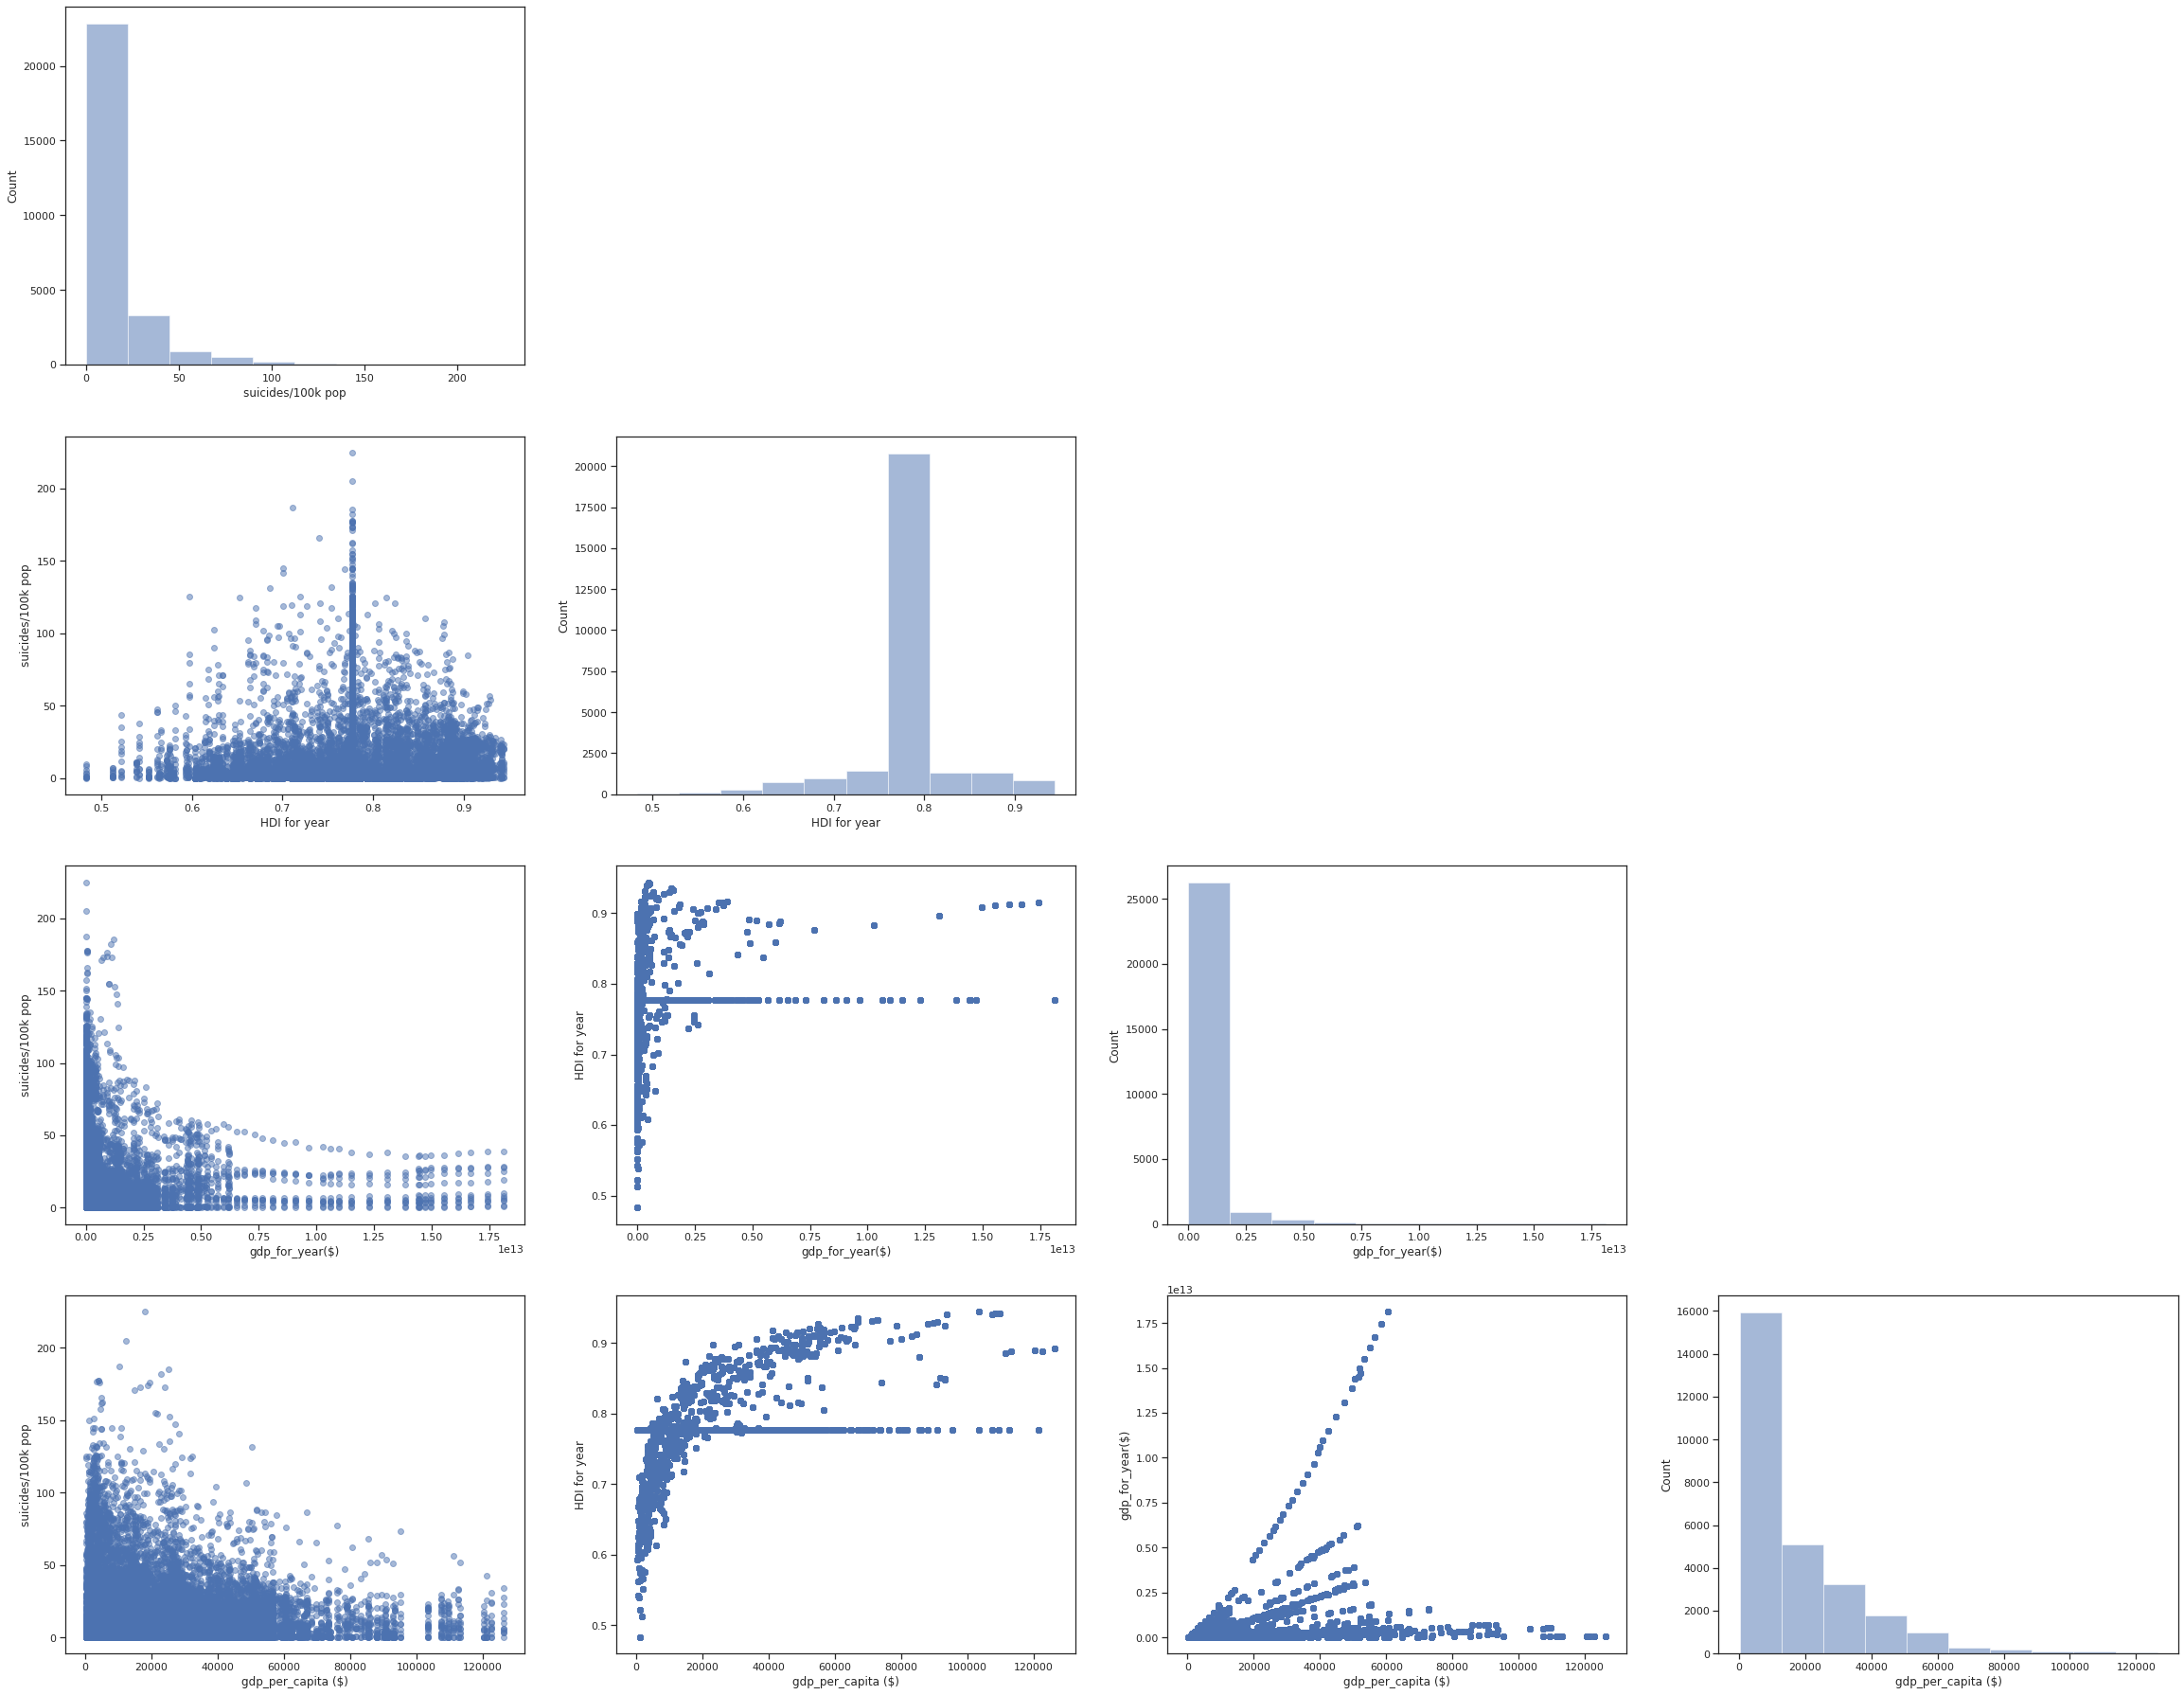

In [24]:
cols = ['suicides/100k pop','HDI for year','gdp_for_year($)', 'gdp_per_capita ($)']

scatterplotmatrix(df1[cols].values, figsize=(40, 32), 
                  names=cols, alpha=0.5)

plt.show()

** QUESTION: 1 **

In [25]:
#********************************** LINEAR REGRESSION MODEL FOR Q-1 *************************************************

In [26]:
# *********************************SETTING UP X & Y ********************************************************

dfX = df.loc[:, df.columns != 'suicides/100k pop']
dfy = df.loc[:, df.columns == 'suicides/100k pop'].values.ravel()

# Sanity check
print(f'N={len(dfX)}, M={len(dfX.columns)}')


# Set our main data structures X and y
X = dfX.values
y = dfy


N=27820, M=119


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [29]:
# ***************** EVALUATION OF MODEL FOR Q-1 **************************

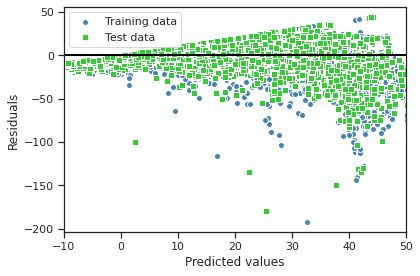

In [30]:
#****************** RESIDUAL PLOT ********************

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()



In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 173.439, test: 172.724
R^2 train: 0.525, test: 0.502


In [121]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)
print(f'The number of coefficients are: {len(slr.coef_)}')

Slope: -0.079
Intercept: 175.136
The number of coefficients are: 119


In [33]:
#************************** PREPPING VALUES FOR PREDICTION FOR Q-1 *******************

In [34]:
# Isolating data (X) for males of age 15-20 belonging to Generation X
dfQ = df.loc[(df['sex_male'] == 1) & (df['age_15-24 years'] == 1) & (df['generation_Generation X'] == 1 )]

# deleting variable to be predicted
del dfQ['suicides/100k pop']

# check
dfQ.head()

,year,HDI for year,gdp_for_year($),gdp_per_capita ($),sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,0.776601,2.156625e+09,796,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1988,0.776601,2.126000e+09,769,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,1989,0.776601,2.335125e+09,833,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,1992,0.776601,7.094526e+08,251,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,1993,0.776601,1.228071e+09,437,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# converting feature valules (X) into an array
xQ = dfQ.values

# predicting 
yQ_pred = slr.predict(xQ)

In [36]:
# getting original y values i.e suicide rate from original data for males of age 15-24 of generation X
dfO = df.loc[(df['sex_male'] == 1) & (df['age_15-24 years'] == 1) & (df['generation_Generation X'] == 1 )]

# converting values to array
df_yO = dfO.loc[:, dfO.columns == 'suicides/100k pop'].values.ravel()
yQ_original = df_yO 

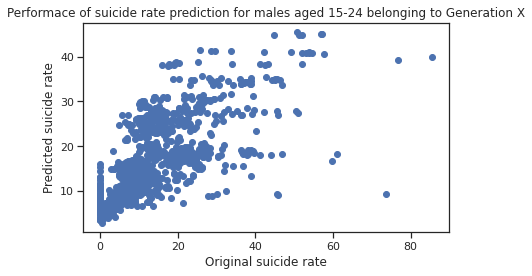

In [37]:
# Scatter plot for predicted and original value

plt.scatter(yQ_original, yQ_pred)
plt.xlabel('Original suicide rate')
plt.ylabel('Predicted suicide rate')
plt.title("Performace of suicide rate prediction for males aged 15-24 belonging to Generation X")
plt.tight_layout()
plt.show()

In [38]:
print('MSE Prediction: %.3f' % (mean_squared_error(yQ_original, yQ_pred)))
print('R^2 Prediction: %.3f' % (r2_score(yQ_original, yQ_pred)))
        

MSE Prediction: 80.919
R^2 Prediction: 0.413


In [39]:
# MAE value to reflect error in real values (original scale)

def mae(_y, _y_pred):
    return (len(_y)**-1) * np.sum(np.abs(_y_pred-_y))

print(f' The model(Q-1) errors in prediciting suicide rate by {mae(yQ_original, yQ_pred)}')

 The model(Q-1) errors in prediciting suicide rate by 6.874778659881183


**QUESTION: 2**

Converting original sex, age, generation to numerical form and then generating a model

In [40]:
df1.head()

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,6.71,0.776601,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,5.19,0.776601,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,4.83,0.776601,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,4.59,0.776601,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,3.28,0.776601,2.156625e+09,796,Boomers


In [41]:
# converting male to 0 and female to 1 in original data set
dfQ2 = df1.copy()
dfQ2['sex'] = dfQ2['sex'].replace({'male':0, 'female':1})

In [42]:
# converting age into numerical values
dfQ2['age'].unique()
dfQ2['age'] = dfQ2['age'].replace({'15-24 years':0, '35-54 years':1,'75+ years': 2, '25-34 years': 3, '55-74 years': 4, '5-14 years': 5 })


In [43]:
# converting generatio into numerical values
dfQ2['generation'].unique()
dfQ2['generation'] = dfQ2['generation'].replace({'Generation X':0, 'Silent':1, 'G.I. Generation':2, 'Boomers':3,
       'Millenials':4, 'Generation Z':5 })

In [44]:
# one hot encoding countries
df9 = dfQ2.copy()
df9 = pd.get_dummies(df9[['country']])

In [45]:
del dfQ2['country']

In [46]:
df_Q2 = pd.concat([dfQ2,df9], axis=1)

In [47]:
# **************** LINEAR REGRESSION MODEL FOR Q-2 *****************

In [48]:
# setting up X and y
dfX_Q2 = df_Q2.loc[:, df_Q2.columns != 'suicides/100k pop']
dfy_Q2 = df_Q2.loc[:, df_Q2.columns == 'suicides/100k pop'].values.ravel()

# Sanity check
print(f'N={len(dfX_Q2)}, M={len(dfX_Q2.columns)}')

N=27820, M=108


In [49]:
# Set our main data structures X and y
X_q2 = dfX_Q2.values
y_q2= dfy_Q2
print(X_q2.shape)
print(y_q2.shape)

(27820, 108)
(27820,)


In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_q2, y_q2, test_size=0.3, random_state=0)

In [51]:
# MODEL

slr_q2 = LinearRegression()
slr_q2.fit(X_train1, y_train1)

# test prediction
y_train_pred1 = slr_q2.predict(X_train1)
y_test_pred1 = slr_q2.predict(X_test1)

In [52]:
# ********************* PERFORMANCE OF MODEL IN Q-2 *************************

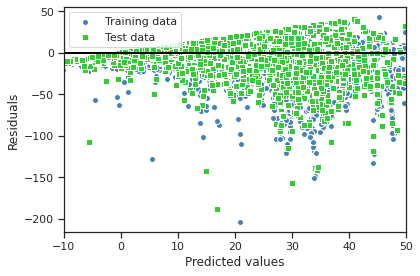

In [53]:
# RESIDUAL PLOT

plt.scatter(y_train_pred1,  y_train_pred1- y_train1,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred1,  y_test_pred1 - y_test1,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()


In [54]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train1, y_train_pred1),
        mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train1, y_train_pred1),
        r2_score(y_test1, y_test_pred1)))


MSE train: 213.314, test: 210.095
R^2 train: 0.415, test: 0.394


In [124]:
print('Slope: %.3f' % slr_q2.coef_[0])
print('Intercept: %.3f' % slr_q2.intercept_)
print(f'The number of regression coefficients are: {len(slr_q2.coef_)}')

Slope: 0.007
Intercept: 14.663
The number of regression coefficients are: 108


In [56]:
# isolating data (x values) (feaute values) for males aged 20 in generation X 
# from dataset for Q2

df_new = df_Q2.loc[(df_Q2['sex'] == 0) & (df_Q2['age'] == 0) & (df_Q2['generation'] == 0 )]
df_new.head()

,year,sex,age,suicides/100k pop,HDI for year,gdp_for_year($),gdp_per_capita ($),generation,country_Albania,country_Antigua and Barbuda,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,1987,0,0,6.71,0.776601,2.156625e+09,796,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,1988,0,0,5.33,0.776601,2.126000e+09,769,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28,1989,0,0,3.71,0.776601,2.335125e+09,833,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37,1992,0,0,3.41,0.776601,7.094526e+08,251,0,1,0,...,0,0,0,0,0,0,0,0,0,0
48,1993,0,0,7.40,0.776601,1.228071e+09,437,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_new['suicides/100k pop'].values.ravel()

array([ 6.71,  5.33,  3.71, ..., 11.39, 13.63, 14.04])

In [58]:
# storing original y values in a df and then deleting it so that rest of df 
# values can be used as X

yNew = df_new['suicides/100k pop'].values.ravel()

del df_new['suicides/100k pop']



In [59]:
# x and predicted values basedon x
xNew = df_new.values
y_NewPred = slr_q2.predict(xNew)

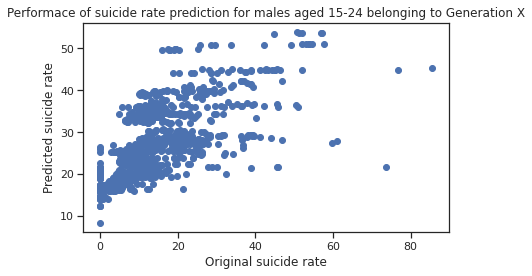

In [60]:
# SCATTER PLOT FOR PREDICTED VALUES

plt.scatter(yNew, y_NewPred)
plt.xlabel('Original suicide rate')
plt.ylabel('Predicted suicide rate')
plt.title("Performace of suicide rate prediction for males aged 15-24 belonging to Generation X")
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()


In [61]:
# evaluaiting model for predictions
print('MSE Predictions: %.3f' % (mean_squared_error(yNew, y_NewPred)))
print('R^2 Predictions: %.3f' % (r2_score(yNew, y_NewPred)))

MSE Predictions: 228.435
R^2 Predictions: -0.658


In [62]:
# MAE 
print(f'The model(Q-2) errors in prediciting suicide rate by {mae(yNew, y_NewPred)}')


The model(Q-2) errors in prediciting suicide rate by 13.592976205120518



**Question: 3**

DIFFERENCES IN TWO MODELS

NO OF COEFFICIENTS:
Model in Q1 (M1): 119
Model in Q2 (M2): 108

SLOPES:
M1: -0.079
M2: 0.007

INTERCEPTS:
M1: 175.136
M2: 14.663

MAE:
M1 - 6.87
M2 - 13.59

MSE:
M1 - 80.91
M2 - 228.434

Prediction Rsq Values:
M1: 0.413
M2: -0.658

Rsq values for training:
M1: 0.52
M2: 0.41

Rsq values for testing:
M1: 0.5
M2: 0.39

- Model for Q-2 is predicting worse than a horizontal line representing the sample mean because it is negative

-Model for Q-1 is not doing great at Rsq value of 0.41 but it is better than M2

-For both models, Rsq of testing is smaller than that of training which means model is overfitting. The difference for M1 is only 0.023 and that for M2 is 0.021 so M1 is slightly better than M2.

** QUESTION: 4**

In [63]:
# Prediction of suicide rates for males aged 33 belonging to generation Alpha
# Generation Alpha = generation after generation Z
# Generation alpha is between 2013 to 2016

# Using model developed in Q-1

In [64]:
df1['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [65]:
df1['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [66]:
df1['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [108]:
# isolating data for males aged 33 (i.e 25-34 age group) belonging to Generation Alpha
#df_Q4 = df.loc[(df['sex_male'] == 1) & (df['age_25-34 years'] == 1) & (df['year'] == 2013) & (df['year'] == 2014) & (df['year'] == 2015) & (df['year'] == 2016)]
df_Q4_2013 = df.loc[(df['sex_male'] == 1) & (df['age_25-34 years'] == 1) & (df['year'] == 2013)]
df_Q4_2014 = df.loc[(df['sex_male'] == 1) & (df['age_25-34 years'] == 1) & (df['year'] == 2014)]
df_Q4_2015 = df.loc[(df['sex_male'] == 1) & (df['age_25-34 years'] == 1) & (df['year'] == 2015)]
df_Q4_2016 = df.loc[(df['sex_male'] == 1) & (df['age_25-34 years'] == 1) & (df['year'] == 2016)]

# concatinating all above 4
df_Q4 = pd.concat([df_Q4_2013, df_Q4_2014, df_Q4_2015,df_Q4_2016 ], axis=0)


In [110]:
# storing original y values in a df and then deleting it so that rest of df 
# values can be used as X

yQ4 = df_Q4['suicides/100k pop'].values.ravel()

del df_Q4['suicides/100k pop']


In [112]:
# x and predicted values based on x
xQ4 = df_Q4.values
y_Q4_Pred = slr.predict(xQ4)

In [119]:
# average prediction for age group 25-34
print(y_Q4_Pred.mean())

18.698371973271414


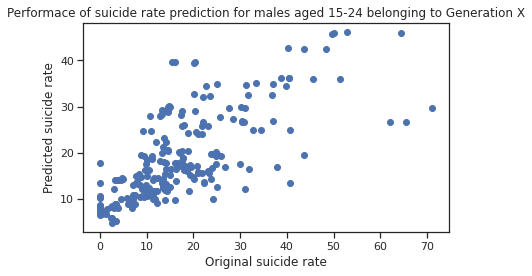

In [114]:
# SCATTER PLOT FOR PREDICTED VALUES

plt.scatter(yQ4, y_Q4_Pred)
plt.xlabel('Original suicide rate')
plt.ylabel('Predicted suicide rate')
plt.title("Performace of suicide rate prediction for males aged 15-24 belonging to Generation X")
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [115]:
# evaluaiting model for predictions
print('MSE Predictions: %.3f' % (mean_squared_error(yQ4, y_Q4_Pred)))
print('R^2 Predictions: %.3f' % (r2_score(yQ4, y_Q4_Pred)))

MSE Predictions: 85.170
R^2 Predictions: 0.495


In [117]:
# MAE 
print(f'The model(Q-1) errors in prediciting suicide rate for males aged 33 belonging to Alpha Generation by {mae(yQ4, y_Q4_Pred)}')

The model(Q-1) errors in prediciting suicide rate for males aged 33 belonging to Alpha Generation by 6.696668548019868


** Question: 5 **

Advantage of regression over classification in terms of independent variables:

Regression models enable establishing relation ships between one or multiple features and a continuous target variable. Hence, regression models can predict values of target variables on a continuous scale. As a result, regression models can be used in science related questions, forecasting and trend evaluation. 





** Question: 6

Advantage of numerical values over one-hot encoding

There are less number of features when using numerical values. This means dataset is smaller and easier to work on. Also, one hot encoding is not useful when there are lot of unique values in a column.

** Question: 7 **

My suggestion will depend on end use of the model. For example If it is a science relate dmodel where predictions are required on a continuousl sclae, I will recommend Regression.

On the other hand, if the model is to be used for predicting categorical variables For example, for recommendation, classifier model can be used.